# JSC270 - Class \#3

## Prof. Chevalier

# Today's Class

- Descriptive statistics:
    - mean, median, mode
    - variance, standard deviation
    - frequency distribution

- Data visualization:
   - visual summary
   - distributions
   - relationships

<center>
    <a href='https://jsc270.github.io/simple_page.html'>https://jsc270.github.io/simple_page.html</a>

</center>

#### Exercise: Scrape the data using BeautifulSoup

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

webpage = 'https://jsc270.github.io/simple_page.html'
page = urlopen(webpage)
soup = BeautifulSoup(page, 'html.parser')

# select all <td> tag elements within <tr> within <tbody> within <table>
# https://www.w3schools.com/cssref/css_selectors.asp 
tabledata=soup.select('table tbody tr td')

# extract text part of tag using list comprehension
tabletext = [m.get_text() for m in tabledata] 
tabletext
# keep only the relevant data
datasets = tabletext[tabletext.index('x') + 8:] # index to the first occurence of x then add 8 for the head
print(datasets)

['10.0', '8.04', '10.0', '9.14', '10.0', '7.46', '8.0', '6.58', '8.0', '6.95', '8.0', '8.14', '8.0', '6.77', '8.0', '5.76', '13.0', '7.58', '13.0', '8.74', '13.0', '12.74', '8.0', '7.71', '9.0', '8.81', '9.0', '8.77', '9.0', '7.11', '8.0', '8.84', '11.0', '8.33', '11.0', '9.26', '11.0', '7.81', '8.0', '8.47', '14.0', '9.96', '14.0', '8.10', '14.0', '8.84', '8.0', '7.04', '6.0', '7.24', '6.0', '6.13', '6.0', '6.08', '8.0', '5.25', '4.0', '4.26', '4.0', '3.10', '4.0', '5.39', '19.0', '12.50', '12.0', '10.84', '12.0', '9.13', '12.0', '8.15', '8.0', '5.56', '7.0', '4.82', '7.0', '7.26', '7.0', '6.42', '8.0', '7.91', '5.0', '5.68', '5.0', '4.74', '5.0', '5.73', '8.0', '6.89']


#### Exercise: Store the four datasets in a data frame

In [4]:
import pandas as pd

# we have four datasets to store
fourdatasets = pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])

###### TODO: write the code to fill out the data frame with the data
for i in range(8):
    fourdatasets[['x1','y1','x2','y2','x3','y3','x4','y4'][i]] = [float(x) for x in datasets[i::8]]

fourdatasets

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


# Descriptive statistics


* Arithmetic mean $$ \overline{X} = \frac{\sum_{i=1}^{n} x_i}{n} $$

* Variance $$ s^2 = \frac{\sum_{i=1}^{n} (x_i - \overline{X})^2}{n - 1}$$

* Standard deviation $$ s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \overline{X})^2}{n - 1}}$$

#### Exercise: Create a statistical summary table of the four datasets

In [5]:
pd.set_option('precision', 1)

def format_summary(data, group):
    return [data['x'+str(group)].mean(),
            data['x'+str(group)].var(),
            data['x'+str(group)].std(),
            data['y'+str(group)].mean(),
            data['y'+str(group)].var(),
            data['y'+str(group)].std()]

summary = pd.DataFrame({          #### TODO: replace the <???> below to complete the table
            'I': format_summary(fourdatasets, 1) ,
            'II':  format_summary(fourdatasets, 2),
            'III': format_summary(fourdatasets, 3),
            'IV':  format_summary(fourdatasets, 4),
    }, index= ['mean x', 'variance x', 'standard deviations x', 
               'mean y', 'variance y', 'standard deviations y'])


summary

,I,II,III,IV
mean x,9.0,9.0,9.0,9.0
variance x,11.0,11.0,11.0,11.0
standard deviations x,3.3,3.3,3.3,3.3
mean y,7.5,7.5,7.5,7.5
variance y,4.1,4.1,4.1,4.1
standard deviations y,2.0,2.0,2.0,2.0


## Visualization

What plot(s) would be intersting to display?

Answer:
 - frequency distribution (histogram)
 - relationship (scatterplot)

## Distributions

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
plt.hist(x=[fourdatasets['x1'], fourdatasets['x2'], fourdatasets['x3'],fourdatasets['x4']], label=['x1','x2','x3','x4'])
plt.legend(loc=7)
plt.title('frequency distribution of x values')
plt.xlabel('x values')
plt.ylabel('count')
plt.show()

fig = plt.figure()
plt.hist(x=[fourdatasets['y1'], fourdatasets['y2'], fourdatasets['y3'],fourdatasets['y4']], label=['y1','y2','y3','y4'])
plt.legend(loc=7)
plt.title('frequency distribution of y values')
plt.xlabel('y values')
plt.ylabel('count')
plt.show()
## TODO: adapt the code above to plot the 
# x frequency distribution for all four datasets

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Boxplots (using pandas)


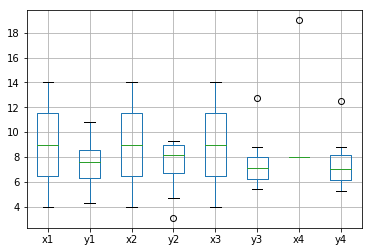

In [7]:
# All boxplots using pandas
fourdatasets.boxplot()

### Exercise: Create a figure with boxplots of x-values by filtering the data frame

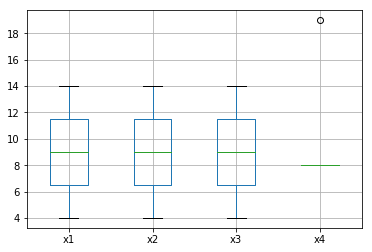

In [8]:
#### TODO: replace <???> with the appropriate code to select the x values only
fourdatasets[fourdatasets.columns[::2]].boxplot()      

### Exercise: Create a figure with boxplots of y values only by filtering the data frame

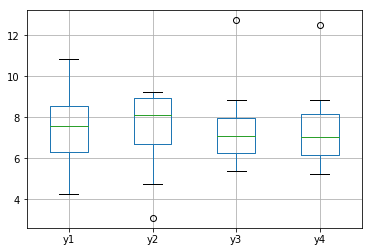

In [9]:
#### TODO: write the appropriate code to select only x values
fourdatasets[fourdatasets.columns[1::2]].boxplot()      

## Boxplots (using matplotlib)

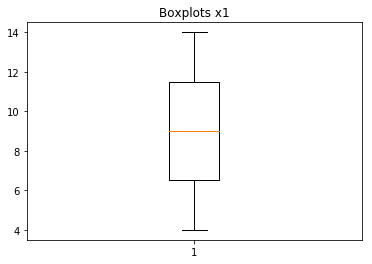

In [10]:
# A single boxplot
fig = plt.figure()               ## Create the main figure
plt.title('Boxplots x1')         ## Add a title to the (unique) plot in the figure
plt.boxplot(fourdatasets.x1)     ## Create the boxplot
plt.show()                       ## Show the result

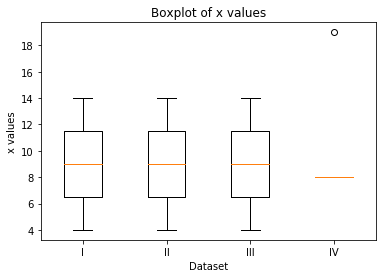

In [11]:
# Multiple boxplots side-by-side

fig = plt.figure()

all_x = [fourdatasets.x1, fourdatasets.x2, fourdatasets.x3, fourdatasets.x4]
names = ['I', 'II', 'III', 'IV']
plt.boxplot(all_x)
plt.xticks([1, 2, 3, 4], names)      ## Replace x ticks with dataset names
plt.xlabel('Dataset')                ## Label the x axis
plt.ylabel('x values')               ## Label the y axis
plt.title('Boxplot of x values')

plt.show()

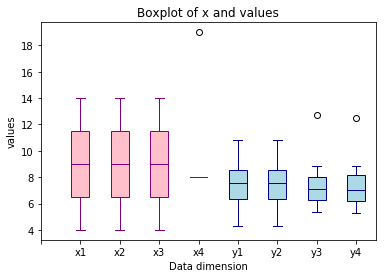

In [12]:
# Multiple boxplots side-by-side
fig = plt.figure()

all_x = [fourdatasets.x1, fourdatasets.x2, fourdatasets.x3, fourdatasets.x4]
all_y = [fourdatasets.y1, fourdatasets.y1, fourdatasets.y3, fourdatasets.y4]
setname = ['I', 'II', 'III', 'IV']
bp_x = plt.boxplot(all_x, positions=[1,2,3,4], patch_artist=True)
bp_y = plt.boxplot(all_y, positions=[5,6,7,8], patch_artist=True)

## Change the colors
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp_x[element], color='purple')
    plt.setp(bp_y[element], color='darkblue')
    
for patch in bp_x['boxes']:
    patch.set(facecolor='pink')
    
for patch in bp_y['boxes']:
    patch.set(facecolor='lightblue')

## Add information to the plot
plt.xticks([0,1,2,3,4,5,6,7,8], 
           ['', 'x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4'])    ## Replace x ticks with dataset names
plt.xlabel('Data dimension')       ## Label the x axis
plt.ylabel('values')               ## Label the y axis
plt.title('Boxplot of x and values')

plt.show()

## Exercise: Let's identify the existance of outliers manually

In [13]:
## Calculating median
print(fourdatasets[fourdatasets.columns[::2]].median())
print(fourdatasets[fourdatasets.columns[1::2]].median())

x1    9.0
x2    9.0
x3    9.0
x4    8.0
dtype: float64
y1    7.6
y2    8.1
y3    7.1
y4    7.0
dtype: float64


In [14]:
## Checking manually for outliers
values = fourdatasets.x1

Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
print("Outliers below min:", any(values < min), 
      "\nOutliers above max:", any(values > max))

Outliers below min: False 
Outliers above max: False


## Mean vs. median vs. mode

In [15]:
import seaborn as sns
movies = pd.read_csv("data/50movies-clean.csv")
movies.head()

,Unnamed: 0,box_office,genre,imdb_rating,imdb_votes,title,metascore,year,language,country
0,0,NaN,Drama Mystery Thriller,7.1,21534.0,First Reformed,85.0,2017,English,USA UK Australia
1,1,NaN,Animation Action Adventure Comedy Family Sci-Fi,8.7,43599.0,Spider-Man: Into the Spider-Verse,87.0,2018,English Spanish,USA
2,2,NaN,Biography Drama History,7.5,66076.0,First Man,84.0,2018,English,USA Japan
3,3,NaN,Drama Music Romance,8.1,118052.0,A Star Is Born,88.0,2018,English,USA
4,4,NaN,Drama,8.2,30951.0,Roma,96.0,2018,Spanish English Norwegian Japanese,Mexico USA


### Frequency distribution of movie data

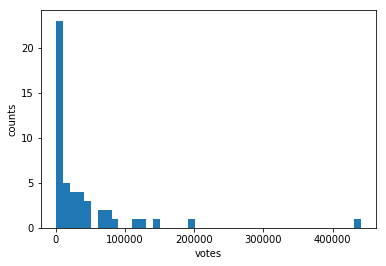

In [16]:
import math
votes = movies['imdb_votes'].astype(float).dropna()
min = math.floor(votes.min())
max = math.ceil(votes.max())
binwidth = 10000

fig = plt.figure()
plt.hist(votes, bins=range(min, max + binwidth, binwidth))
plt.xlabel('votes')
plt.ylabel('counts')
plt.show()

In [17]:
votes.mean()

38588.93877551021

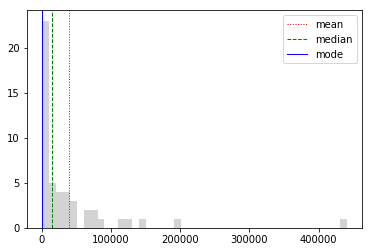

In [18]:
## Plot the frequency distribution, mean, median and mode
from scipy import stats

fig = plt.figure()
plt.hist(votes, color='lightgray', bins=range(min, max + binwidth, binwidth))

## Add vertical lines to idicate the mean, median and mode values:
plt.axvline(votes.mean(), 
            linewidth=1, color='red', linestyle=':', label = "mean")  
plt.axvline(votes.median(), 
            linewidth=1, color='green', linestyle='--', label = "median")
plt.axvline(stats.mode(votes).mode[0], 
            linewidth=1, color='blue', linestyle='-', label = "mode")

## Adding the legend:
plt.legend(loc='upper right')
plt.show()

## Scatterplots

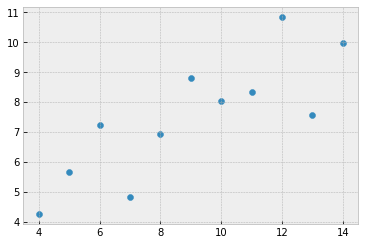

In [19]:
plt.style.use('bmh')

## Plotting x against y
plt.figure()
plt.scatter(fourdatasets.x1, fourdatasets.y1)
plt.show()

## Title, labels

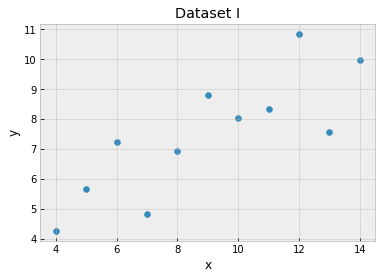

In [20]:
plt.title('Dataset I')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(fourdatasets.x1, fourdatasets.y1)
plt.show()

## Markers

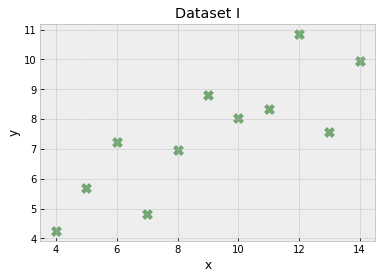

In [21]:
plt.title('Dataset I')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(fourdatasets.x1, fourdatasets.y1, 
            s=100,            # size of individual visual marks, in points 
            marker="X",       # style of the marker
            c="darkgreen",    # color of the mark
            alpha=0.5)        # opacity (0=transparent, 1=opaque)
plt.show()

## Multiple plots (superimposed)
<a href="http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3">Colorbrewer for choose color</a>

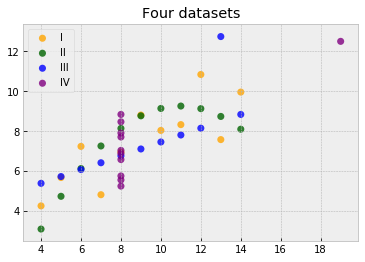

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)       # nrow, ncolumn, index 

ax.scatter(fourdatasets.x1, fourdatasets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50, label="I")
ax.scatter(fourdatasets.x2, fourdatasets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50, label="II")
ax.scatter(fourdatasets.x3, fourdatasets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50, label="III")
ax.scatter(fourdatasets.x4, fourdatasets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50, label="IV")

 
plt.title('Four datasets')     # set title for the figure
plt.legend(loc=2)                    # specify the location of the legend 
plt.show()

## Multiple plots (side-by-side)

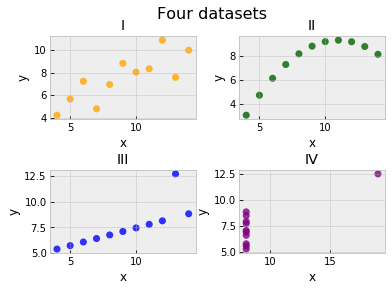

In [23]:
fig = plt.figure()  ## Try changing the properties of the figure: figsize=(w, h)

fig.suptitle("Four datasets", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

ax1 = fig.add_subplot(2, 2, 1)       
ax1.scatter(fourdatasets.x1, fourdatasets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(fourdatasets.x2, fourdatasets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(fourdatasets.x3, fourdatasets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

ax4 = fig.add_subplot(2, 2, 4)
ax4.scatter(fourdatasets.x4, fourdatasets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

plt.show()

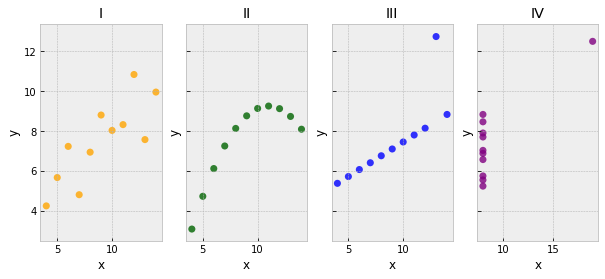

In [24]:
## A more concise version:

fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

def addScatter(x, y, setname, color, index):
    axs[index].scatter(x,y,alpha=0.8, c=color, edgecolors='none', s=50)
    axs[index].set_xlabel("x")
    axs[index].set_ylabel("y")
    axs[index].set_title(setname)

addScatter(fourdatasets.x1, fourdatasets.y1, "I", "orange", 0)
addScatter(fourdatasets.x2, fourdatasets.y2, "II", "darkgreen", 1)
addScatter(fourdatasets.x3, fourdatasets.y3, "III", "blue", 2)
addScatter(fourdatasets.x4, fourdatasets.y4, "IV", "purple", 3)

## Multiple plots (juxtaposed in a grid)

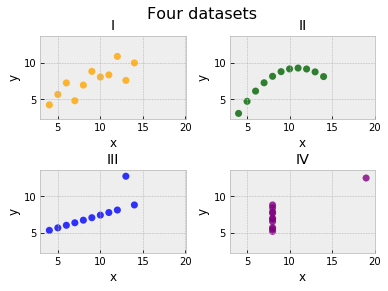

In [25]:
# Multiple plots separated with shared axes

fig = plt.figure()
fig.suptitle("Four datasets", fontsize=16)
fig.subplots_adjust(hspace=0.6, wspace=0.3)       ## add space between plots

ax1 = fig.add_subplot(2, 2, 1)       
ax1.scatter(fourdatasets.x1, fourdatasets.y1, 
           alpha=0.8, c="orange", edgecolors='none', s=50)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("I")

ax2 = fig.add_subplot(2, 2, 2, sharex = ax1, sharey = ax1)
ax2.scatter(fourdatasets.x2, fourdatasets.y2, 
           alpha=0.8, c="darkgreen", edgecolors='none', s=50)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("II")

ax3 = fig.add_subplot(2, 2, 3, sharex = ax1, sharey = ax1)
ax3.scatter(fourdatasets.x3, fourdatasets.y3, 
           alpha=0.8, c="blue", edgecolors='none', s=50)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("III")

ax4 = fig.add_subplot(2, 2, 4,  sharex = ax1, sharey = ax1)
ax4.scatter(fourdatasets.x4, fourdatasets.y4, 
           alpha=0.8, c="purple", edgecolors='none', s=50)
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("IV")

plt.show()

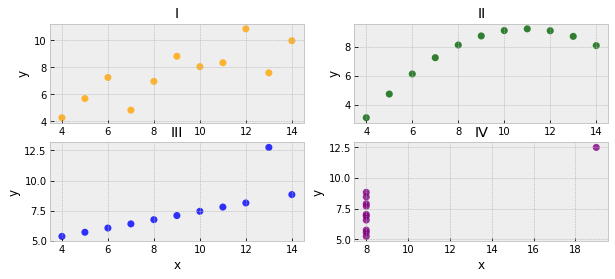

In [26]:
## Exercise: write a more concise version of the above code
fig, axs = plt.subplots(2, 2, figsize=(10, 4))

def addScatter2(x, y, setname, color, index):
    row = index // 2
    col = index % 2
    ax = axs[row][col]
    ax.scatter(x,y,alpha=0.8, c=color, edgecolors='none', s=50)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(setname)

addScatter2(fourdatasets.x1, fourdatasets.y1, "I", "orange", 0)
addScatter2(fourdatasets.x2, fourdatasets.y2, "II", "darkgreen", 1)
addScatter2(fourdatasets.x3, fourdatasets.y3, "III", "blue", 2)
addScatter2(fourdatasets.x4, fourdatasets.y4, "IV", "purple", 3)

## Anscombe's quartet and seaborn

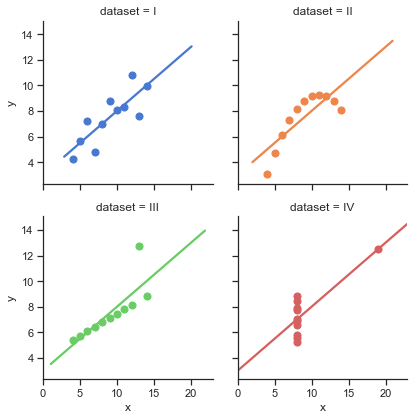

In [2]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=3,
           scatter_kws={"s": 50, "alpha": 1})

## Datasaurus dozen

<img src="img/datasaurus.png" width=600></img>

## Homework

The datasaurus dozen dataset can be found [here](https://www.autodeskresearch.com/sites/default/files/The%20Datasaurus%20Dozen.zip)

* Create a summary statistic table with the different dataset properties
* Visualize the different datasets as a scatterplot

## Ordinal data

In [28]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.3,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.1,NaN,S


Note:
* Embarked: C = Cherbourg, Q = Queenstown, S = Southampton
* Pclass: 1 = Upper, 2 = Middle, 3 = Lower
* Survived: 0 = No, 1 = Yes
* SibSup: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic 

## Question: What is the age distribution per class?

<Figure size 432x288 with 0 Axes>

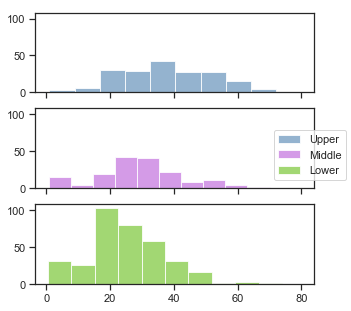

In [29]:
fig = plt.figure()

upper = titanic.loc[titanic['Pclass'] == 1]
middle = titanic.loc[titanic['Pclass'] == 2]
lower = titanic.loc[titanic['Pclass'] == 3]

colors=["#7aa0c4","#ca82e1" ,"#8bcd50"]

fig, axs = plt.subplots(3, 1, figsize=(5, 5), sharey=True, sharex=True)

axs[0].hist(x=upper['Age'].dropna(), alpha=0.8, color=colors[0], label="Upper")
axs[1].hist(x=middle['Age'].dropna(), alpha=0.8, color=colors[1], label="Middle")
axs[2].hist(x=lower['Age'].dropna(), alpha=0.8,  color=colors[2], label="Lower")

fig.legend(loc=7)
plt.show()

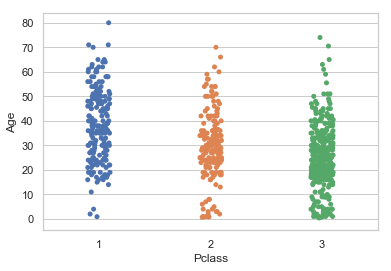

In [30]:
import seaborn as sns
sns.set(style="whitegrid")

sns.stripplot(x="Pclass", y="Age", data=titanic, jitter=True)
ax.set_xlabel("Class")
ax.set_ylabel("Age")
plt.show()

In [1]:
ax = sns.boxplot(x="Pclass", y="Age", hue="Sex",
                 data=titanic, palette="Set3")

NameError: name 'sns' is not defined

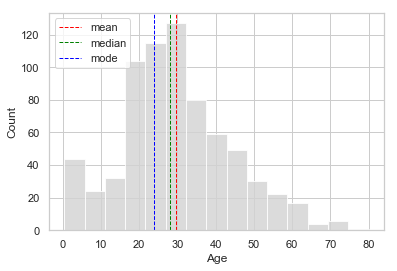

In [31]:
col = 'Age'
numdata = titanic[col]

fig = plt.figure()
ax = numdata.hist(bins=15, color='lightgray', alpha=0.8)
ax.set(xlabel=col, ylabel='Count')

ax.axvline(numdata.mean(), 
            linewidth=1, color='red', linestyle='--', label = "mean") 
ax.axvline(numdata.median(), 
            linewidth=1, color='green', linestyle='--', label = "median")
ax.axvline(stats.mode(numdata).mode[0], 
            linewidth=1, color='blue', linestyle='--', label = "mode")
plt.legend(loc='upper left')

plt.show()

### Exercise: Change the value of `col` to `Pclass` and `Survived` and observe the distributions and statistics

## Categorical data

#### Question: what is the distribution of passengers by gender?

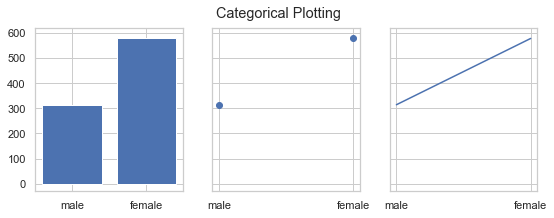

In [32]:
names = titanic['Sex'].unique()
values = titanic['Sex'].groupby(titanic['Sex']).count()

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

### Exercise: Are these visualizations appropriate?


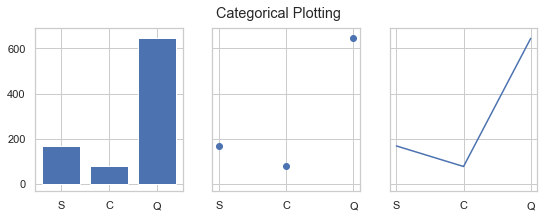

In [33]:
names = titanic['Embarked'].dropna().unique()
values = titanic['Embarked'].dropna().groupby(titanic['Embarked']).count()

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.show()

## Categorical bar plot

#### Question: What is the survival probability by class and gender?



C:\Users\lihd1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


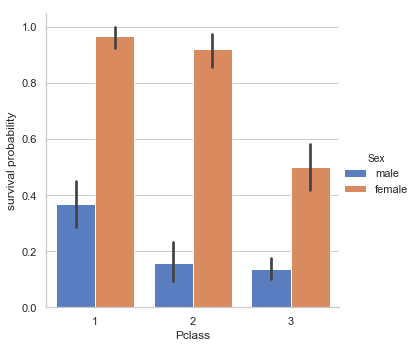

In [34]:
ax = sns.catplot(x="Pclass", y="Survived", hue="Sex",         # Try replacing hue by col
                data=titanic,
                kind="bar", palette="muted")
ax.set_ylabels("survival probability")

## Multiple histogram with seaborn

#### Question: how many passengers were in the titanic, per gender and per class?

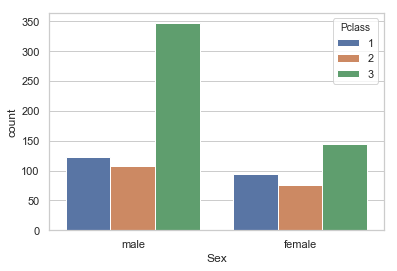

In [35]:
ax = sns.countplot(x="Sex", hue="Pclass", data=titanic)